<a href="https://colab.research.google.com/github/razor2002/Software-Engineering-J-Component/blob/main/Software_J_Comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


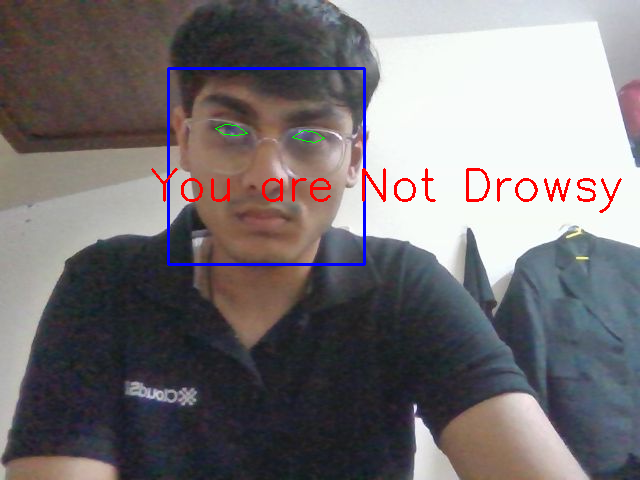

In [4]:
# Import necessary libraries
from scipy.spatial import distance
from imutils import face_utils
import matplotlib.pyplot as plt
import numpy as np
import pygame  # For playing sound
import time
import dlib
import cv2
from google.colab.patches import cv2_imshow

# Initialize Pygame and load music

# Minimum threshold of eye aspect ratio below which alarm is triggerd
EYE_ASPECT_RATIO_THRESHOLD = 0.3
# Minimum consecutive frames for which eye ratio is below threshold for alarm to be triggered
EYE_ASPECT_RATIO_CONSEC_FRAMES = 50
# COunts no. of consecutuve frames below threshold value
COUNTER = 0
# Load face cascade which will be used to draw a rectangle around detected faces.
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/haarcascade_frontalface_default.xml")
# This function calculates and return eye aspect ratio
def eye_aspect_ratio(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A+B) / (2*C)
    return ear
# Load face detector and predictor, uses dlib shape predictor file
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat')
# Extract indexes of facial landmarks for the left and right eye
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS['left_eye']
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS['right_eye']
# Start webcam video capture
video_capture = cv2.VideoCapture(0)
#Give some time for camera to initialize(not required)
time.sleep(2)
i = 0
while(i < 1):
#Read each frame and flip it, and convert to grayscale
    # ret, frame = video_capture.read()
    i = i + 1
    frame = cv2.imread("/content/photo.jpg")
    frame = cv2.flip(frame,1)
    #print(ret)
    #print(frame)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #Detect facial points through detector function
    faces = detector(gray, 0)

    #Detect faces through haarcascade_frontalface_default.xml
    face_rectangle = face_cascade.detectMultiScale(gray, 1.3, 5)
    #Draw rectangle around each face detected
    for (x,y,w,h) in face_rectangle:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    #Detect facial points
    for face in faces:
      shape = predictor(gray, face)
      shape = face_utils.shape_to_np(shape)
      #Get array of coordinates of leftEye and rightEye
      leftEye = shape[lStart:lEnd]
      rightEye = shape[rStart:rEnd]
      #Calculate aspect ratio of both eyes
      leftEyeAspectRatio = eye_aspect_ratio(leftEye)
      rightEyeAspectRatio = eye_aspect_ratio(rightEye)
      eyeAspectRatio = (leftEyeAspectRatio + rightEyeAspectRatio) / 2
      #Use hull to remove convex contour discrepencies and draw eye shape around eyes
      leftEyeHull = cv2.convexHull(leftEye)
      rightEyeHull = cv2.convexHull(rightEye)
      cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
      cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
      #Detect if eye aspect ratio is less than threshold
      if(eyeAspectRatio < EYE_ASPECT_RATIO_THRESHOLD):
          COUNTER += 1
          cv2.putText(frame, "You are Drowsy", (150,200), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,0,255), 2)
      else:
          COUNTER = 0
          cv2.putText(frame, "You are Not Drowsy", (150,200), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,0,255), 2)
      #Show video feed
      # img = cv2.imread('photo.jpg')
      cv2_imshow(frame)
      if(cv2.waitKey(1) & 0xFF == ord('q')):
          break
      #Finally when video capture is over, release the video capture and destroyAllWindows
      # video_capture.release()
      cv2.destroyAllWindows()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [3]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'